# Analysis of NYC Taxi Data - July 2018

## Setup

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 40)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
import Plotting
Plotting.plotly.offline.init_notebook_mode(connected=True)

## Extract, Transform, Load

In [7]:
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',encoding='utf-8-sig')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=200)   #skiprows=100
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=2,encoding='utf-8-sig')   #skiprows=100

df=pd.read_hdf('data_taxi_merged.h5', 'df')

### Get initial feel for data and quality

In [8]:
df.shape

(15100468, 21)

In [9]:
peek=df.head(5)

In [10]:
peek

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.5,759
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.6,540
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.6,1318
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.9,799
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.6,1017


In [11]:
df.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 pickup_datetime        object
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
 rate_code               int64
 dropoff_datetime       object
 dropoff_latitude      float64
 dropoff_longitude     float64
 passenger_count         int64
 pickup_latitude       float64
 pickup_longitude      float64
 store_and_fwd_flag     object
 trip_distance         float64
 trip_time_in_secs       int64
dtype: object

In [12]:
df.isnull().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [13]:
df.isna().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [14]:
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,trip_distance,trip_time_in_secs
count,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510032e+07,1.510032e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07
mean,1.227417e+01,3.266898e-01,4.983206e-01,1.345662e+00,2.446353e-01,1.468948e+01,1.033242e+00,4.004795e+01,-7.269257e+01,1.709030e+00,4.006861e+01,-7.273425e+01,2.862899e+00,7.466081e+02
std,9.958736e+00,3.673146e-01,2.892903e-02,2.131956e+00,1.185930e+00,1.194023e+01,3.451167e-01,6.977638e+00,9.858587e+00,1.385621e+00,6.956628e+00,9.731627e+00,3.344187e+00,5.504414e+02
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,-3.547898e+03,-2.771290e+03,0.000000e+00,-3.481141e+03,-2.323420e+03,0.000000e+00,0.000000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,4.073417e+01,-7.399143e+01,1.000000e+00,4.073512e+01,-7.399213e+01,1.040000e+00,3.600000e+02
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00,4.075333e+01,-7.398007e+01,1.000000e+00,4.075281e+01,-7.398172e+01,1.780000e+00,6.000000e+02
75%,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01,1.000000e+00,4.076832e+01,-7.396362e+01,2.000000e+00,4.076754e+01,-7.396676e+01,3.200000e+00,9.600000e+02
max,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02,2.100000e+02,3.577126e+03,2.228746e+03,9.000000e+00,3.210393e+03,2.228722e+03,1.000000e+02,1.080000e+04


In [15]:
df[' fare_amount'].skew()

3.724584648821671

In [16]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs'],
      dtype='object')

## Transform and Enhance data

In [17]:
pickup_dt=pd.to_datetime(df[' pickup_datetime'])
#pickup_dt=pd.Timestamp(df[' pickup_datetime'])

In [18]:
pickup_dt

0          2013-04-04 18:47:45
1          2013-04-05 07:08:34
2          2013-04-04 17:59:50
3          2013-04-04 18:12:01
4          2013-04-04 20:12:57
5          2013-04-05 02:48:11
6          2013-04-05 06:16:10
7          2013-04-05 06:20:10
8          2013-04-04 19:20:16
9          2013-04-03 18:05:38
10         2013-04-03 18:04:40
11         2013-04-03 18:07:31
12         2013-04-03 18:02:54
13         2013-04-04 19:19:42
14         2013-04-04 19:12:32
15         2013-04-05 14:42:31
16         2013-04-05 14:56:55
17         2013-04-04 07:23:21
18         2013-04-03 20:17:03
19         2013-04-03 20:22:41
20         2013-04-03 18:40:50
21         2013-04-03 18:42:01
22         2013-04-03 19:05:55
23         2013-04-03 19:24:08
24         2013-04-03 19:30:16
25         2013-04-05 00:15:15
26         2013-04-04 18:38:52
27         2013-04-04 18:51:12
28         2013-04-04 18:12:42
29         2013-04-04 20:20:30
                   ...        
15100438   2013-04-16 22:42:00
15100439

In [19]:
#pickup_dt.astype('datetime64[s]')
[pickup_dt.dt.hour, pickup_dt.dt.minute, pickup_dt.dt.weekday_name]

[0           18
 1            7
 2           17
 3           18
 4           20
 5            2
 6            6
 7            6
 8           19
 9           18
 10          18
 11          18
 12          18
 13          19
 14          19
 15          14
 16          14
 17           7
 18          20
 19          20
 20          18
 21          18
 22          19
 23          19
 24          19
 25           0
 26          18
 27          18
 28          18
 29          20
             ..
 15100438    22
 15100439    22
 15100440    22
 15100441    22
 15100442    19
 15100443    19
 15100444    19
 15100445    19
 15100446    19
 15100447    19
 15100448    19
 15100449    19
 15100450    19
 15100451    19
 15100452    20
 15100453    17
 15100454    17
 15100455    17
 15100456    18
 15100457    17
 15100458    17
 15100459    18
 15100460    17
 15100461    18
 15100462    18
 15100463    18
 15100464    17
 15100465    17
 15100466    17
 15100467    17
 Name:  pickup_datetime,

In [20]:
df['pickup_dt_hour']=pickup_dt.dt.hour
df['pickup_dt_day']=pickup_dt.dt.weekday_name

In [21]:
df['total_income']=df[' fare_amount']+df[' tip_amount']+df[' surcharge']

In [22]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30


In [23]:
pickup_dt.dt.time    #replace(hour=0, minute=0, second=0, microsecond=0)

0           18:47:45
1           07:08:34
2           17:59:50
3           18:12:01
4           20:12:57
5           02:48:11
6           06:16:10
7           06:20:10
8           19:20:16
9           18:05:38
10          18:04:40
11          18:07:31
12          18:02:54
13          19:19:42
14          19:12:32
15          14:42:31
16          14:56:55
17          07:23:21
18          20:17:03
19          20:22:41
20          18:40:50
21          18:42:01
22          19:05:55
23          19:24:08
24          19:30:16
25          00:15:15
26          18:38:52
27          18:51:12
28          18:12:42
29          20:20:30
              ...   
15100438    22:42:00
15100439    22:42:00
15100440    22:45:00
15100441    22:40:00
15100442    19:39:00
15100443    19:30:00
15100444    19:55:00
15100445    19:48:00
15100446    19:46:00
15100447    19:39:00
15100448    19:48:00
15100449    19:51:00
15100450    19:39:00
15100451    19:52:00
15100452    20:05:00
15100453    17:46:00
15100454    1

In [24]:
from datetime import datetime

In [25]:
midnight=datetime

In [26]:
pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [27]:
pickup_time_sec=pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

In [28]:
pickup_time_sec

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [29]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs',
       'pickup_dt_hour', 'pickup_dt_day', 'total_income'],
      dtype='object')

In [30]:
df['pickup_dt_secmidnight']=pickup_time_sec

In [31]:
L1distance = abs(df[' pickup_latitude']-df[' dropoff_latitude'])+abs(df[' pickup_longitude']-df[' dropoff_longitude'])

In [32]:
df['L1distance']=L1distance

In [33]:
L2distance = ((df[' pickup_latitude']-df[' dropoff_latitude'])**2+(df[' pickup_longitude']-df[' dropoff_longitude'])**2)**0.5

In [34]:
df['L2distance']=L2distance

In [35]:
df['pickup_dateday']=pickup_dt.dt.day    #get the day of the month

In [36]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income,pickup_dt_secmidnight,L1distance,L2distance,pickup_dateday
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50,67665,0.038746,0.027431,4
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30,25714,0.000000,0.000000,5
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10,64790,0.065922,0.047555,4
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45,65521,0.035644,0.026041,4
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70,72777,0.061036,0.047597,4
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10,10091,0.012520,0.008904,5
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50,22570,0.018577,0.013799,5
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10,22810,0.033104,0.024981,5
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75,69616,0.007904,0.006354,4
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30,65138,0.035919,0.028518,3


In [37]:
df_remove_outlier_latitude3=df[((df[[' pickup_latitude',' dropoff_latitude']] >40.50) & (df[[' pickup_latitude',' dropoff_latitude']] < 41.00)).all(axis=1)]

In [38]:
df_remove_outlier_latitudelongitude=df_remove_outlier_latitude3[((df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] >-74.25) & (df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] < -73.75)).all(axis=1)]

In [39]:
df_remove_outlier_latitudelongitude.shape

(14811704, 28)

In [40]:
df_remove_outlier_latitudelongitude.shape

(14811704, 28)

## Open question D:  Taxi driver, minimise worktime in a day

Let's start by finding the number of hack_licenses (drivers) and how much they earn each day

In [41]:
driver_income_per_day=df_remove_outlier_latitudelongitude.pivot_table(index=' hack_license', columns='pickup_dateday', values='total_income', aggfunc='sum')

In [42]:
driver_income_per_day.shape

(32961, 30)

So 32,961 drivers. And 30 days of the month of April.

In [43]:
driver_income_per_day

pickup_dateday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
hack_license,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002555BBE359440D6CEB34B699D3932,NaN,198.45,311.80,312.85,338.10,309.75,125.60,NaN,202.85,246.65,277.00,418.20,291.45,79.40,NaN,161.80,287.20,478.35,354.62,415.05,173.00,NaN,209.75,222.45,356.21,318.90,403.65,160.40,NaN,213.50
000894B0A4A38A167C23588A0F31864D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.32,NaN,373.32,322.82,336.80,193.52,NaN,NaN,329.15,299.60,NaN,328.65,258.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000B8D660A329BBDBF888500E4BD8B98,77.20,NaN,NaN,224.25,314.80,397.92,431.15,33.00,249.97,318.62,232.25,312.52,347.21,379.50,63.50,278.83,339.67,278.57,358.50,423.17,377.55,136.94,202.02,287.05,252.64,321.55,452.27,200.20,NaN,129.40
000C15EFBDF58CAED528C09E597484EC,NaN,NaN,NaN,NaN,334.87,177.50,NaN,NaN,NaN,308.00,65.50,343.15,179.30,NaN,NaN,298.45,383.90,45.10,NaN,NaN,NaN,NaN,388.25,30.00,NaN,NaN,NaN,NaN,NaN,337.45
00117D7CCD47D125E77163A7AC2C66EB,298.05,86.06,NaN,NaN,342.10,406.72,451.97,260.85,15.10,NaN,NaN,351.48,495.99,472.48,297.86,43.25,NaN,NaN,258.30,260.70,409.09,NaN,297.37,6.00,302.24,97.75,339.70,410.42,73.70,237.15
0011B1575B9F5398BBC0F27EA560D631,NaN,NaN,NaN,NaN,474.99,NaN,NaN,418.08,NaN,NaN,NaN,593.40,NaN,NaN,397.88,NaN,NaN,NaN,412.95,473.28,506.43,380.03,NaN,NaN,NaN,402.00,327.27,485.93,NaN,NaN
0012703023AC1788D34F6694908900FC,508.35,21.50,610.67,79.65,298.05,143.40,NaN,581.75,72.50,535.45,359.94,461.75,103.90,NaN,500.35,NaN,492.15,34.00,519.05,81.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00184958F5D5FD0A9EC0B115C5B55796,228.55,NaN,309.02,340.40,320.50,329.63,NaN,274.70,31.00,335.12,317.52,394.22,280.61,NaN,239.18,NaN,259.22,329.14,367.42,340.97,NaN,274.20,NaN,358.56,327.00,353.85,271.60,NaN,299.85,NaN
001916B0A5713FF05D936EFF82EEBA02,NaN,236.30,311.08,285.38,393.33,375.98,85.80,246.23,308.32,284.72,272.82,378.90,258.08,133.25,371.31,327.80,130.80,314.62,386.20,375.05,63.87,375.16,302.97,350.70,385.32,389.35,313.85,101.30,384.33,351.93


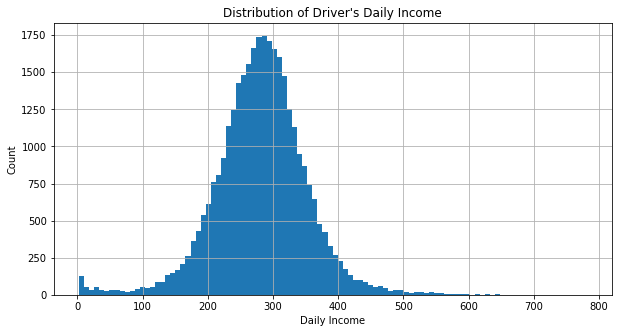

In [44]:
driver_income_per_day.mean(axis=1).hist(bins=100);       #for each driver, their average daily income averaged across the 30 days
plt.xlabel('Daily Income');
plt.ylabel('Count');
plt.title("Distribution of Driver's Daily Income");

In [45]:
driver_income_per_day.mean(axis=1).median()

282.8146153846154

In [46]:
driver_income_per_day.mean(axis=1).mean()

281.3171469716826

So let's take the average daily wage earned by a typical driver as $282

In [47]:
ave_income_per_trip_by_hour=df_remove_outlier_latitudelongitude.pivot_table(index='pickup_dt_hour', values='total_income', aggfunc='mean')

In [48]:
ave_income_per_trip_by_hour

,total_income
pickup_dt_hour,
0,14.714829
1,14.450811
2,14.321788
3,14.664066
4,16.590419
5,18.360894
6,13.974889
7,13.024202
8,13.029491


In [49]:
median_income_per_trip_by_hour=df_remove_outlier_latitudelongitude.pivot_table(index='pickup_dt_hour', values='total_income', aggfunc='median')

In [50]:
median_income_per_trip_by_hour

,total_income
pickup_dt_hour,
0,11.50
1,11.50
2,11.50
3,11.85
4,12.50
5,11.50
6,9.40
7,9.50
8,10.00


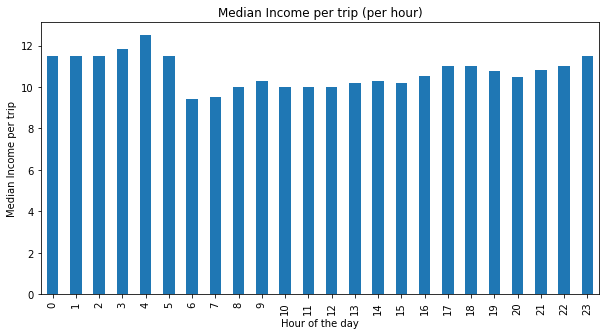

In [72]:
median_income_per_trip_by_hour.plot.bar(legend=False);
plt.xlabel('Hour of the day');
plt.ylabel('Median Income per trip');
plt.title("Median Income per trip (per hour)");

In [52]:
trips10am=df_remove_outlier_latitudelongitude[df_remove_outlier_latitudelongitude['pickup_dt_hour']==10]

In [53]:
trips10am.shape

(676919, 28)

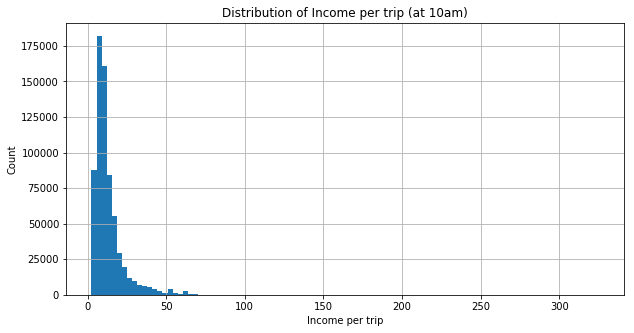

In [54]:
trips10am['total_income'].hist(bins=100);
plt.xlabel('Income per trip');
plt.ylabel('Count');
plt.title("Distribution of Income per trip (at 10am)");

In [55]:
trips10am['total_income'].mean()

12.991728242227609

In [56]:
trips10am['total_income'].median()

10.0

Due to skewed distribution, better to use median to represent average income per trip.

In [57]:
median_trips_per_taxi_by_hour=df_remove_outlier_latitudelongitude.pivot_table(index='pickup_dt_hour', columns='medallion', values='total_income', aggfunc='count')/30  #divide by 30 as proxy for daily amount since count is over the month

In [58]:
median_trips_per_taxi_by_hour.shape

(24, 13296)

In [59]:
median_trips_per_taxi_by_hour

medallion,00005007A9F30E289E760362F69E4EAD,000318C2E3E6381580E5C99910A60668,000351EDC735C079246435340A54C7C1,0009986BDBAB2F9A125FEF49D0BFCCDD,00115F46520039845A5F719C979BEA45,00153E36140C5B2A84EA308F355A7925,001C8EC421C9BE57D08576617465401A,001D3B86C2ACDEE4D1B98AFE52969F3D,001DFAC01BC0A32F48C3769DD1414778,00244196AAA321571762E0CCC55EEAD9,002B4CFC5B8920A87065FC131F9732D1,002E3B405B6ABEA23B6305D3766140F1,0030AD2648D81EE87796445DB61FCF20,0035520A854E4F2769B37DAF5357426F,0036961468659D0BFC7241D92E8ED865,00377E15077848677B32CE184CE7E871,003889E315BFDD985664FE5A4BCC0EC4,0038EF45118925A510975FD0CCD67192,003D87DB553C6F00F774C8575BC8444A,003EEA559FA61800874D4F6805C4A084,...,FF9EE82E0716241CB0466787348AF71B,FFA00BDFE6BC7DD95D36D20154B06A53,FFAE0B4090E31DE701697F7987164B49,FFAE711E9DD14336199F6A74DD849466,FFB0895138617D01A745E5A7C9F15117,FFB1D86301D7CCD329B6AEFF09546C4D,FFB2AA0A5F7EA57B18799EB60CB5E792,FFBFCA8A2DE362A445D7375BD5B64FD6,FFC6BE0FC070E78A65F9A0858D10ED63,FFCFA7AFF0DE2B5081C6C1A11099A691,FFD1575DA3F4DB85CCEC9FFBEAE16AEF,FFD8F49027A47FE0B5C6A597CAD3B3AF,FFE1AB76511357473BE3236025321493,FFE25FFFBDE6A6019A6A9051C4E798FA,FFEC9171E009541071F4CAB49DF113C9,FFED7CFCB1A658ADEC2DC6A899047060,FFEE0D464EEA83AF6EA50CA5738B5610,FFF010F904EF7B60DAF12560AFE5127C,FFF9D2834D24079962E68642F14BAC82,FFFECF75AB6CC4FF9E8A8B633AB81C26
pickup_dt_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.833333,1.533333,2.133333,2.300000,1.633333,1.433333,2.066667,1.200000,1.800000,NaN,1.000000,1.833333,1.733333,0.800000,1.066667,1.466667,0.900000,1.766667,1.266667,2.566667,...,1.366667,0.500000,2.566667,1.566667,1.933333,1.133333,1.866667,1.600000,1.566667,2.000000,1.633333,0.500000,1.400000,0.866667,0.700000,1.033333,0.133333,0.900000,1.833333,1.400000
1,1.233333,0.966667,1.833333,1.600000,1.266667,1.833333,1.266667,0.766667,0.866667,NaN,1.066667,1.200000,0.866667,0.700000,1.000000,1.600000,0.933333,1.800000,0.833333,1.633333,...,1.033333,0.400000,1.166667,1.066667,0.666667,0.866667,1.833333,1.100000,1.033333,0.833333,0.966667,0.666667,0.366667,0.433333,0.466667,1.000000,0.033333,0.466667,1.100000,0.700000
2,0.733333,1.033333,1.433333,1.533333,1.333333,1.700000,0.800000,0.400000,0.800000,NaN,0.900000,0.966667,0.600000,0.733333,0.700000,1.300000,0.800000,1.466667,0.400000,0.933333,...,0.400000,0.266667,1.066667,0.533333,0.666667,0.666667,1.266667,1.133333,0.700000,0.533333,0.900000,0.366667,0.200000,0.100000,0.266667,0.666667,NaN,0.600000,0.533333,0.533333
3,0.500000,0.700000,0.966667,1.433333,1.200000,1.066667,0.700000,0.266667,0.733333,NaN,0.966667,0.566667,0.566667,0.400000,0.600000,1.400000,0.366667,1.333333,0.166667,0.666667,...,0.333333,0.133333,0.766667,0.200000,0.333333,0.533333,0.633333,0.833333,0.800000,0.366667,0.900000,0.166667,0.033333,0.033333,0.066667,0.266667,NaN,0.400000,0.233333,0.500000
4,0.200000,0.633333,0.133333,1.033333,0.300000,0.900000,0.400000,0.033333,0.366667,NaN,0.866667,0.366667,NaN,0.133333,0.366667,1.233333,0.033333,1.166667,0.166667,0.066667,...,0.566667,0.033333,0.533333,0.266667,0.066667,0.166667,0.166667,0.733333,0.333333,0.133333,0.266667,0.166667,NaN,NaN,0.033333,0.200000,NaN,0.733333,0.066667,0.200000
5,0.066667,0.533333,0.333333,1.100000,0.133333,0.433333,0.366667,0.100000,0.800000,NaN,0.900000,0.400000,NaN,0.166667,0.133333,0.966667,0.066667,0.333333,0.200000,0.233333,...,0.300000,NaN,0.066667,0.933333,0.033333,0.300000,NaN,0.300000,NaN,NaN,NaN,0.666667,NaN,NaN,0.033333,0.133333,NaN,0.766667,0.066667,NaN
6,0.400000,0.366667,1.433333,1.333333,0.833333,0.133333,0.700000,0.033333,1.200000,NaN,1.366667,0.233333,NaN,0.200000,1.333333,0.800000,0.266667,0.200000,0.100000,1.500000,...,0.200000,0.033333,1.133333,1.400000,NaN,0.500000,1.033333,0.433333,0.333333,0.166667,NaN,1.166667,NaN,NaN,NaN,NaN,NaN,2.066667,0.100000,NaN
7,1.866667,1.566667,2.800000,2.100000,0.733333,0.366667,1.566667,NaN,2.266667,NaN,2.033333,0.300000,0.966667,0.300000,3.033333,1.400000,1.433333,1.366667,1.400000,2.400000,...,0.233333,0.066667,2.800000,2.100

In [60]:
median_trips_per_taxi_by_hour.median(axis=1)

pickup_dt_hour
0     1.566667
1     1.100000
2     0.833333
3     0.633333
4     0.400000
5     0.300000
6     0.766667
7     1.633333
8     2.000000
9     1.966667
10    1.833333
11    1.866667
12    1.966667
13    1.900000
14    2.000000
15    1.900000
16    1.433333
17    1.866667
18    2.466667
19    2.533333
20    2.433333
21    2.366667
22    2.333333
23    2.033333
dtype: float64

In [61]:
median_trips_per_taxi_by_hour.mean(axis=1)

pickup_dt_hour
0     1.490044
1     1.100577
2     0.857359
3     0.658868
4     0.516861
5     0.472067
6     0.936019
7     1.557656
8     1.844763
9     1.849751
10    1.745897
11    1.773629
12    1.845666
13    1.802542
14    1.871984
15    1.787478
16    1.492182
17    1.833126
18    2.288205
19    2.367300
20    2.300347
21    2.228865
22    2.179147
23    1.918068
dtype: float64

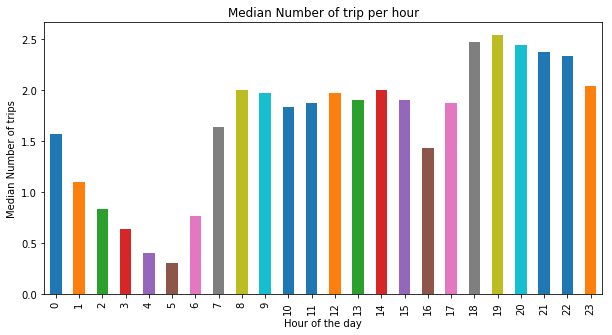

In [62]:
median_trips_per_taxi_by_hour.median(axis=1).plot.bar(); 
plt.xlabel('Hour of the day');
plt.ylabel('Median Number of trips');
plt.title("Median Number of trip per hour");

In [63]:
median_income_per_trip_by_hour.values.T 

array([[11.5 , 11.5 , 11.5 , 11.85, 12.5 , 11.5 ,  9.4 ,  9.5 , 10.  ,
        10.3 , 10.  , 10.  , 10.  , 10.2 , 10.3 , 10.2 , 10.55, 11.  ,
        11.  , 10.75, 10.5 , 10.8 , 11.  , 11.5 ]])

In [64]:
median_trips_per_taxi_by_hour.median(axis=1).values

array([1.56666667, 1.1       , 0.83333333, 0.63333333, 0.4       ,
       0.3       , 0.76666667, 1.63333333, 2.        , 1.96666667,
       1.83333333, 1.86666667, 1.96666667, 1.9       , 2.        ,
       1.9       , 1.43333333, 1.86666667, 2.46666667, 2.53333333,
       2.43333333, 2.36666667, 2.33333333, 2.03333333])

In [65]:
#do an elementwise multiply of these vectors:
expected_income_per_hour = median_income_per_trip_by_hour.values.T  * median_trips_per_taxi_by_hour.median(axis=1).values

In [66]:
df_expected_income_per_hour = pd.DataFrame(expected_income_per_hour.T, columns=['income_per_hour'])  #convert ndarray to df

In [67]:
df_expected_income_per_hour

,income_per_hour
0,18.016667
1,12.650000
2,9.583333
3,7.505000
4,5.000000
5,3.450000
6,7.206667
7,15.516667
8,20.000000
9,20.256667


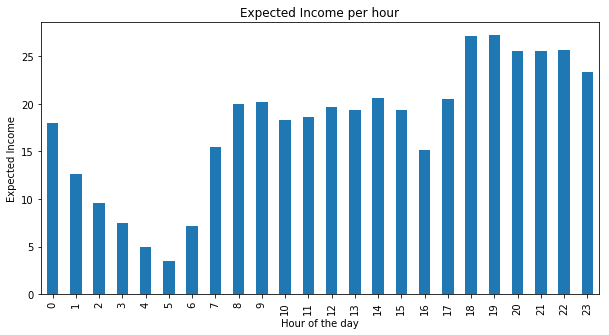

In [68]:
df_expected_income_per_hour.plot.bar(legend=False);
plt.xlabel('Hour of the day');
plt.ylabel('Expected Income');
plt.title("Expected Income per hour");

In [69]:
df_expected_income_per_hour.iloc[11:24].sum()

income_per_hour    287.875
dtype: float64

So if you drive from 11am to midnight, you will expect to earn $288.